# 1. Import and Install Dependencies

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
results

mediapipe.python.solution_base.SolutionOutputs

In [21]:
draw_landmarks(frame, results)

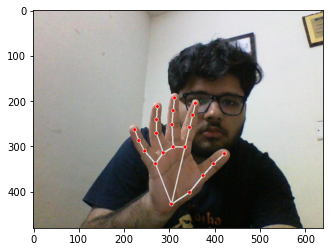

In [22]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [6]:
len(results.right_hand_landmarks.landmark)

NameError: name 'results' is not defined

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [8]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [8]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])
#     return np.concatenate([pose, lh, rh])

In [10]:
result_test = extract_keypoints(results)

In [50]:
result_test

array([ 7.74524093e-01,  8.33451450e-01,  3.03776858e-07,  7.04906881e-01,
        8.14141929e-01, -3.15992571e-02,  6.48984492e-01,  7.45689154e-01,
       -4.63447385e-02,  6.17902756e-01,  6.74207389e-01, -5.76915517e-02,
        5.90536356e-01,  6.13965034e-01, -6.72264025e-02,  6.67660296e-01,
        6.04040205e-01, -2.15141270e-02,  6.45320594e-01,  5.10839164e-01,
       -3.92192788e-02,  6.34442389e-01,  4.52853888e-01, -5.65399937e-02,
        6.25219285e-01,  4.02629882e-01, -7.03888834e-02,  7.15910196e-01,
        5.84646523e-01, -2.19980013e-02,  7.02585757e-01,  4.79016483e-01,
       -3.44040804e-02,  6.95315897e-01,  4.14222240e-01, -4.91545759e-02,
        6.84876621e-01,  3.62991273e-01, -6.11496195e-02,  7.62976348e-01,
        5.92982650e-01, -2.70106811e-02,  7.65101552e-01,  4.97022152e-01,
       -4.25308868e-02,  7.63105512e-01,  4.36766446e-01, -5.69517016e-02,
        7.55772352e-01,  3.84454250e-01, -6.80737272e-02,  8.09035778e-01,
        6.21742189e-01, -

In [36]:
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [9]:
path = os.getcwd()

In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(path, 'MP_Data') 

# Actions that we try to detect
actions = np.array(['0', '1', '2'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [11]:
actions = np.array(['0','1','2'])

In [12]:
DATA_PATH

'C:\\Users\\VG\\OneDrive - iitr.ac.in\\Documents\\Anushruti\\Holistic Gesture\\ActionDetectionforSignLanguage-main\\MP_Data'

In [98]:
for action in actions: 
    try:
        os.makedirs(os.path.join(DATA_PATH, action))
    except:
        pass
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except:
        dirmax = 0
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [99]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
#     for action in actions:
    action = '2'
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length+1):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # NEW Apply wait logic
            if frame_num == 0: 
#                 cv2.waitKey(4000)
                cv2.putText(image, 'Press p to start', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                if cv2.waitKey(10) & 0xFF != ord('p'):
                    cv2.waitKey(-1)
                cv2.putText(image, 'Starting', (120,300), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(2000)
                
            elif frame_num == sequence_length-1:
                cv2.putText(image, 'Video Completed', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 2, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(800)

                

            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)

            # NEW Export keypoints
            if frame_num != 0:
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-1))
                np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'0': 0, '1': 1, '2': 2}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
np.array(sequences).shape

(90, 30, 126)

In [18]:
np.array(labels).shape

(90,)

In [19]:
X = np.array(sequences)

In [20]:
X.shape

(90, 30, 126)

In [21]:
y = to_categorical(labels).astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [23]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import TensorBoard

In [30]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()

model.add(
    Bidirectional(
      LSTM(
          units=64,
          return_sequences=True,
          activation = 'relu',
          input_shape=(30,126)
      )
    )
)

# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=4000, callbacks=[tb_callback])

Epoch 1/4000
3/3 [==============================] - 7s 62ms/step - loss: 1.1016 - categorical_accuracy: 0.3176
Epoch 2/4000
3/3 [==============================] - 0s 72ms/step - loss: 1.0847 - categorical_accuracy: 0.4588
Epoch 3/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.0649 - categorical_accuracy: 0.3647
Epoch 4/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.9584 - categorical_accuracy: 0.3529
Epoch 5/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.9216 - categorical_accuracy: 0.3882
Epoch 6/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.8996 - categorical_accuracy: 0.4824
Epoch 7/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.8381 - categorical_accuracy: 0.4471
Epoch 8/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.7504 - categorical_accuracy: 0.6588
Epoch 9/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.7258 - categorical_accuracy: 0.6471
E

3/3 [==============================] - 0s 74ms/step - loss: 1.0938 - categorical_accuracy: 0.3294
Epoch 74/4000
3/3 [==============================] - 0s 70ms/step - loss: 1.1071 - categorical_accuracy: 0.3294
Epoch 75/4000
3/3 [==============================] - 0s 77ms/step - loss: 1.1508 - categorical_accuracy: 0.3176
Epoch 76/4000
3/3 [==============================] - 0s 114ms/step - loss: 1.0901 - categorical_accuracy: 0.3294
Epoch 77/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.0922 - categorical_accuracy: 0.3294
Epoch 78/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.0475 - categorical_accuracy: 0.3294
Epoch 79/4000
3/3 [==============================] - 0s 73ms/step - loss: 1.0160 - categorical_accuracy: 0.4824
Epoch 80/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.7871 - categorical_accuracy: 0.4941
Epoch 81/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.9064 - categorical_accuracy: 0.5529
Epoch

3/3 [==============================] - 0s 82ms/step - loss: 0.4775 - categorical_accuracy: 0.7647
Epoch 146/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.3959 - categorical_accuracy: 0.8824
Epoch 147/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.4096 - categorical_accuracy: 0.8235
Epoch 148/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.4031 - categorical_accuracy: 0.7765
Epoch 149/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.4354 - categorical_accuracy: 0.7765
Epoch 150/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.3992 - categorical_accuracy: 0.8235
Epoch 151/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.3716 - categorical_accuracy: 0.8706
Epoch 152/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.4524 - categorical_accuracy: 0.8353
Epoch 153/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.5574 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 66ms/step - loss: 0.3853 - categorical_accuracy: 0.8941
Epoch 218/4000
3/3 [==============================] - 0s 62ms/step - loss: 0.3198 - categorical_accuracy: 0.9059
Epoch 219/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.3556 - categorical_accuracy: 0.9176
Epoch 220/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.3056 - categorical_accuracy: 0.9412
Epoch 221/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.2966 - categorical_accuracy: 0.9412
Epoch 222/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.3061 - categorical_accuracy: 0.9176
Epoch 223/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.2829 - categorical_accuracy: 0.9529
Epoch 224/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.2843 - categorical_accuracy: 0.9176
Epoch 225/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.2767 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 75ms/step - loss: 0.2659 - categorical_accuracy: 0.8588
Epoch 290/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.2937 - categorical_accuracy: 0.8588
Epoch 291/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.3384 - categorical_accuracy: 0.8118
Epoch 292/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.1899 - categorical_accuracy: 0.9294
Epoch 293/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.6259 - categorical_accuracy: 0.8706
Epoch 294/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.4437 - categorical_accuracy: 0.8588
Epoch 295/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.3403 - categorical_accuracy: 0.8824
Epoch 296/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.4494 - categorical_accuracy: 0.8824
Epoch 297/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.4149 - categorical_accuracy: 0.811

3/3 [==============================] - 0s 85ms/step - loss: 0.1043 - categorical_accuracy: 0.9647
Epoch 362/4000
3/3 [==============================] - 0s 86ms/step - loss: 0.0765 - categorical_accuracy: 0.9765
Epoch 363/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.1136 - categorical_accuracy: 0.9765
Epoch 364/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.1054 - categorical_accuracy: 0.9529
Epoch 365/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0717 - categorical_accuracy: 0.9882
Epoch 366/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0448 - categorical_accuracy: 1.0000
Epoch 367/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0539 - categorical_accuracy: 1.0000
Epoch 368/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0552 - categorical_accuracy: 0.9882
Epoch 369/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0454 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 67ms/step - loss: 0.0185 - categorical_accuracy: 1.0000
Epoch 434/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.0160 - categorical_accuracy: 1.0000
Epoch 435/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0155 - categorical_accuracy: 1.0000
Epoch 436/4000
3/3 [==============================] - 0s 81ms/step - loss: 0.0180 - categorical_accuracy: 1.0000
Epoch 437/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0191 - categorical_accuracy: 1.0000
Epoch 438/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 439/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0134 - categorical_accuracy: 1.0000
Epoch 440/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 441/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0257 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 72ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 506/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 507/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 508/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 509/4000
3/3 [==============================] - 0s 91ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 510/4000
3/3 [==============================] - 0s 80ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 511/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 512/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.0120 - categorical_accuracy: 0.9882
Epoch 513/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0025 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 68ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 578/4000
3/3 [==============================] - 0s 81ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 579/4000
3/3 [==============================] - 0s 83ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 580/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 581/4000
3/3 [==============================] - 0s 82ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 582/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 583/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 584/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 585/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0012 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 65ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 649/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 650/4000
3/3 [==============================] - 0s 65ms/step - loss: 9.1773e-04 - categorical_accuracy: 1.0000
Epoch 651/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 652/4000
3/3 [==============================] - 0s 62ms/step - loss: 8.4955e-04 - categorical_accuracy: 1.0000
Epoch 653/4000
3/3 [==============================] - 0s 63ms/step - loss: 8.7022e-04 - categorical_accuracy: 1.0000
Epoch 654/4000
3/3 [==============================] - 0s 66ms/step - loss: 8.9718e-04 - categorical_accuracy: 1.0000
Epoch 655/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 656/4000
3/3 [==============================] - 0s 69ms/step - loss: 9.5824e-04 - categor

3/3 [==============================] - 0s 67ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 719/4000
3/3 [==============================] - 0s 64ms/step - loss: 5.1271e-04 - categorical_accuracy: 1.0000
Epoch 720/4000
3/3 [==============================] - 0s 70ms/step - loss: 5.1643e-04 - categorical_accuracy: 1.0000
Epoch 721/4000
3/3 [==============================] - 0s 63ms/step - loss: 5.0309e-04 - categorical_accuracy: 1.0000
Epoch 722/4000
3/3 [==============================] - 0s 71ms/step - loss: 5.2860e-04 - categorical_accuracy: 1.0000
Epoch 723/4000
3/3 [==============================] - 0s 71ms/step - loss: 6.0523e-04 - categorical_accuracy: 1.0000
Epoch 724/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 725/4000
3/3 [==============================] - 0s 73ms/step - loss: 5.8145e-04 - categorical_accuracy: 1.0000
Epoch 726/4000
3/3 [==============================] - 0s 66ms/step - loss: 8.7662e-04 -

3/3 [==============================] - 0s 72ms/step - loss: 3.9871e-04 - categorical_accuracy: 1.0000
Epoch 789/4000
3/3 [==============================] - 0s 65ms/step - loss: 3.2744e-04 - categorical_accuracy: 1.0000
Epoch 790/4000
3/3 [==============================] - 0s 74ms/step - loss: 6.1804e-04 - categorical_accuracy: 1.0000
Epoch 791/4000
3/3 [==============================] - 0s 76ms/step - loss: 3.6122e-04 - categorical_accuracy: 1.0000
Epoch 792/4000
3/3 [==============================] - 0s 72ms/step - loss: 4.9750e-04 - categorical_accuracy: 1.0000
Epoch 793/4000
3/3 [==============================] - 0s 71ms/step - loss: 5.1446e-04 - categorical_accuracy: 1.0000
Epoch 794/4000
3/3 [==============================] - 0s 57ms/step - loss: 4.1658e-04 - categorical_accuracy: 1.0000
Epoch 795/4000
3/3 [==============================] - 0s 66ms/step - loss: 6.5853e-04 - categorical_accuracy: 1.0000
Epoch 796/4000
3/3 [==============================] - 0s 72ms/step - loss: 4.67

3/3 [==============================] - 0s 58ms/step - loss: 3.5249e-04 - categorical_accuracy: 1.0000
Epoch 859/4000
3/3 [==============================] - 0s 66ms/step - loss: 3.2091e-04 - categorical_accuracy: 1.0000
Epoch 860/4000
3/3 [==============================] - 0s 57ms/step - loss: 2.7908e-04 - categorical_accuracy: 1.0000
Epoch 861/4000
3/3 [==============================] - 0s 62ms/step - loss: 3.2874e-04 - categorical_accuracy: 1.0000
Epoch 862/4000
3/3 [==============================] - 0s 62ms/step - loss: 2.9325e-04 - categorical_accuracy: 1.0000
Epoch 863/4000
3/3 [==============================] - 0s 66ms/step - loss: 2.6961e-04 - categorical_accuracy: 1.0000
Epoch 864/4000
3/3 [==============================] - 0s 62ms/step - loss: 2.9431e-04 - categorical_accuracy: 1.0000
Epoch 865/4000
3/3 [==============================] - 0s 65ms/step - loss: 2.5581e-04 - categorical_accuracy: 1.0000
Epoch 866/4000
3/3 [==============================] - 0s 64ms/step - loss: 3.08

3/3 [==============================] - 0s 67ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 929/4000
3/3 [==============================] - 0s 65ms/step - loss: 2.8812e-04 - categorical_accuracy: 1.0000
Epoch 930/4000
3/3 [==============================] - 0s 65ms/step - loss: 3.5185e-04 - categorical_accuracy: 1.0000
Epoch 931/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0020 - categorical_accuracy: 1.0000ETA: 0s - loss: 7.4124e-04 - categorical_accuracy: 1.
Epoch 932/4000
3/3 [==============================] - 0s 70ms/step - loss: 2.8515e-04 - categorical_accuracy: 1.0000
Epoch 933/4000
3/3 [==============================] - 0s 63ms/step - loss: 2.3801e-04 - categorical_accuracy: 1.0000
Epoch 934/4000
3/3 [==============================] - 0s 72ms/step - loss: 2.9083e-04 - categorical_accuracy: 1.0000
Epoch 935/4000
3/3 [==============================] - 0s 69ms/step - loss: 2.2553e-04 - categorical_accuracy: 1.0000
Epoch 936/4000
3/3 [==============

3/3 [==============================] - 0s 65ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1000/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0084 - categorical_accuracy: 1.0000
Epoch 1001/4000
3/3 [==============================] - 0s 62ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1002/4000
3/3 [==============================] - 0s 80ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1003/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1004/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1005/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1006/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 1007/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0047 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 5.2307e-04 - categorical_accuracy: 1.0000
Epoch 1070/4000
3/3 [==============================] - 0s 64ms/step - loss: 6.0214e-04 - categorical_accuracy: 1.0000
Epoch 1071/4000
3/3 [==============================] - 0s 66ms/step - loss: 6.6740e-04 - categorical_accuracy: 1.0000
Epoch 1072/4000
3/3 [==============================] - 0s 69ms/step - loss: 6.2211e-04 - categorical_accuracy: 1.0000
Epoch 1073/4000
3/3 [==============================] - 0s 65ms/step - loss: 5.7693e-04 - categorical_accuracy: 1.0000
Epoch 1074/4000
3/3 [==============================] - 0s 70ms/step - loss: 5.6431e-04 - categorical_accuracy: 1.0000
Epoch 1075/4000
3/3 [==============================] - 0s 72ms/step - loss: 4.2692e-04 - categorical_accuracy: 1.0000
Epoch 1076/4000
3/3 [==============================] - 0s 66ms/step - loss: 6.8966e-04 - categorical_accuracy: 1.0000
Epoch 1077/4000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 64ms/step - loss: 0.4896 - categorical_accuracy: 0.8706
Epoch 1141/4000
3/3 [==============================] - 0s 59ms/step - loss: 0.4438 - categorical_accuracy: 0.8118
Epoch 1142/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.3328 - categorical_accuracy: 0.8588
Epoch 1143/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.2898 - categorical_accuracy: 0.9176
Epoch 1144/4000
3/3 [==============================] - 0s 56ms/step - loss: 0.3348 - categorical_accuracy: 0.8588
Epoch 1145/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.2845 - categorical_accuracy: 0.8941
Epoch 1146/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.2548 - categorical_accuracy: 0.9059
Epoch 1147/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.2683 - categorical_accuracy: 0.9059
Epoch 1148/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.1757 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.1048 - categorical_accuracy: 0.9765
Epoch 1212/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.1046 - categorical_accuracy: 0.9882
Epoch 1213/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0869 - categorical_accuracy: 0.9882
Epoch 1214/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.1154 - categorical_accuracy: 0.9647
Epoch 1215/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.1956 - categorical_accuracy: 0.9412
Epoch 1216/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0667 - categorical_accuracy: 0.9882
Epoch 1217/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0771 - categorical_accuracy: 1.0000
Epoch 1218/4000
3/3 [==============================] - ETA: 0s - loss: 0.0753 - categorical_accuracy: 0.98 - 0s 57ms/step - loss: 0.1155 - categorical_accuracy: 0.9647
Epoch 1219/4000
3/3 [=============================

3/3 [==============================] - 0s 58ms/step - loss: 0.0247 - categorical_accuracy: 0.9882
Epoch 1283/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0273 - categorical_accuracy: 0.9882
Epoch 1284/4000
3/3 [==============================] - 0s 61ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 1285/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0635 - categorical_accuracy: 0.9765
Epoch 1286/4000
3/3 [==============================] - 0s 60ms/step - loss: 0.0729 - categorical_accuracy: 0.9647
Epoch 1287/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0222 - categorical_accuracy: 0.9882
Epoch 1288/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.1418 - categorical_accuracy: 0.9765
Epoch 1289/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0248 - categorical_accuracy: 0.9882
Epoch 1290/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0563 - categorical_accurac

Epoch 1354/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 1355/4000
3/3 [==============================] - 0s 62ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 1356/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 1357/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0081 - categorical_accuracy: 1.0000
Epoch 1358/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1359/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1360/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1361/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1362/4000
3/3 [==============================] - 0s 59ms/step - loss: 0.0027 - cat

3/3 [==============================] - 0s 68ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 1426/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0604 - categorical_accuracy: 0.9765
Epoch 1427/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 1428/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1429/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0383 - categorical_accuracy: 0.9882
Epoch 1430/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 1431/4000
3/3 [==============================] - 0s 60ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1432/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 1433/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0012 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 8.2517e-04 - categorical_accuracy: 1.0000
Epoch 1497/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1498/4000
3/3 [==============================] - 0s 69ms/step - loss: 4.4594e-04 - categorical_accuracy: 1.0000
Epoch 1499/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 1500/4000
3/3 [==============================] - 0s 67ms/step - loss: 9.7028e-04 - categorical_accuracy: 1.0000
Epoch 1501/4000
3/3 [==============================] - 0s 65ms/step - loss: 8.0533e-04 - categorical_accuracy: 1.0000
Epoch 1502/4000
3/3 [==============================] - 0s 71ms/step - loss: 1.3509e-04 - categorical_accuracy: 1.0000
Epoch 1503/4000
3/3 [==============================] - 0s 77ms/step - loss: 7.4346e-05 - categorical_accuracy: 1.0000
Epoch 1504/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.58

3/3 [==============================] - 0s 83ms/step - loss: 2.9720e-04 - categorical_accuracy: 1.0000
Epoch 1567/4000
3/3 [==============================] - 0s 83ms/step - loss: 1.9408e-04 - categorical_accuracy: 1.0000
Epoch 1568/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1569/4000
3/3 [==============================] - 0s 83ms/step - loss: 0.0147 - categorical_accuracy: 0.9882
Epoch 1570/4000
3/3 [==============================] - 0s 68ms/step - loss: 1.2514e-04 - categorical_accuracy: 1.0000
Epoch 1571/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1572/4000
3/3 [==============================] - 0s 70ms/step - loss: 3.3832e-05 - categorical_accuracy: 1.0000
Epoch 1573/4000
3/3 [==============================] - 0s 74ms/step - loss: 4.1045e-04 - categorical_accuracy: 1.0000
Epoch 1574/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0127 -

3/3 [==============================] - 0s 76ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1637/4000
3/3 [==============================] - 0s 74ms/step - loss: 4.7651e-04 - categorical_accuracy: 1.0000
Epoch 1638/4000
3/3 [==============================] - 0s 70ms/step - loss: 9.5070e-04 - categorical_accuracy: 1.0000
Epoch 1639/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1640/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1641/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1642/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1643/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1644/4000
3/3 [==============================] - 0s 70ms/step - loss: 2.8196e-04 - categor

3/3 [==============================] - 0s 72ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1707/4000
3/3 [==============================] - 0s 67ms/step - loss: 5.4022e-04 - categorical_accuracy: 1.0000
Epoch 1708/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1709/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.5191e-04 - categorical_accuracy: 1.0000
Epoch 1710/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 1711/4000
3/3 [==============================] - 0s 74ms/step - loss: 4.4240e-04 - categorical_accuracy: 1.0000
Epoch 1712/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0299 - categorical_accuracy: 0.9882
Epoch 1713/4000
3/3 [==============================] - 0s 71ms/step - loss: 3.0694e-04 - categorical_accuracy: 1.0000
Epoch 1714/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0012 - cat

Epoch 1777/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1778/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1779/4000
3/3 [==============================] - ETA: 0s - loss: 0.0107 - categorical_accuracy: 1.00 - 0s 53ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 1780/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1781/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1782/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1783/4000
3/3 [==============================] - 0s 61ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1784/4000
3/3 [==============================] - 0s 60ms/step - loss: 0.0264 - categorical_accuracy: 0.9882
Epoch 1785/4000
3/3 [=============

3/3 [==============================] - 0s 62ms/step - loss: 1.0572e-04 - categorical_accuracy: 1.0000
Epoch 1848/4000
3/3 [==============================] - 0s 63ms/step - loss: 7.0406e-04 - categorical_accuracy: 1.0000
Epoch 1849/4000
3/3 [==============================] - 0s 65ms/step - loss: 2.9741e-05 - categorical_accuracy: 1.0000
Epoch 1850/4000
3/3 [==============================] - 0s 66ms/step - loss: 2.6203e-04 - categorical_accuracy: 1.0000
Epoch 1851/4000
3/3 [==============================] - 0s 65ms/step - loss: 8.1180e-04 - categorical_accuracy: 1.0000
Epoch 1852/4000
3/3 [==============================] - 0s 66ms/step - loss: 3.1442e-04 - categorical_accuracy: 1.0000
Epoch 1853/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1854/4000
3/3 [==============================] - 0s 69ms/step - loss: 3.2492e-05 - categorical_accuracy: 1.0000
Epoch 1855/4000
3/3 [==============================] - 0s 69ms/step - loss: 

3/3 [==============================] - 0s 73ms/step - loss: 8.5603e-04 - categorical_accuracy: 1.0000
Epoch 1917/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1918/4000
3/3 [==============================] - 0s 68ms/step - loss: 2.4348e-04 - categorical_accuracy: 1.0000
Epoch 1919/4000
3/3 [==============================] - 0s 82ms/step - loss: 2.3937e-05 - categorical_accuracy: 1.0000
Epoch 1920/4000
3/3 [==============================] - 0s 81ms/step - loss: 1.4463e-04 - categorical_accuracy: 1.0000
Epoch 1921/4000
3/3 [==============================] - 0s 92ms/step - loss: 1.0679e-04 - categorical_accuracy: 1.0000
Epoch 1922/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1923/4000
3/3 [==============================] - 0s 68ms/step - loss: 3.1424e-05 - categorical_accuracy: 1.0000
Epoch 1924/4000
3/3 [==============================] - 0s 84ms/step - loss: 7.55

3/3 [==============================] - 0s 67ms/step - loss: 0.0153 - categorical_accuracy: 0.9882
Epoch 1986/4000
3/3 [==============================] - 0s 76ms/step - loss: 1.0736e-04 - categorical_accuracy: 1.0000
Epoch 1987/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1988/4000
3/3 [==============================] - 0s 65ms/step - loss: 1.6257e-05 - categorical_accuracy: 1.0000
Epoch 1989/4000
3/3 [==============================] - 0s 67ms/step - loss: 8.7646e-05 - categorical_accuracy: 1.0000
Epoch 1990/4000
3/3 [==============================] - 0s 70ms/step - loss: 1.1028e-04 - categorical_accuracy: 1.0000
Epoch 1991/4000
3/3 [==============================] - 0s 70ms/step - loss: 4.3733e-04 - categorical_accuracy: 1.0000
Epoch 1992/4000
3/3 [==============================] - 0s 67ms/step - loss: 2.0598e-05 - categorical_accuracy: 1.0000 0s - loss: 2.0598e-05 - categorical_accuracy: 1.00
Epoch 1993/4000
3/3 [========

3/3 [==============================] - 0s 82ms/step - loss: 1.7607e-04 - categorical_accuracy: 1.0000
Epoch 2055/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 2056/4000
3/3 [==============================] - 0s 67ms/step - loss: 3.6549e-04 - categorical_accuracy: 1.0000
Epoch 2057/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 2058/4000
3/3 [==============================] - 0s 68ms/step - loss: 9.7411e-05 - categorical_accuracy: 1.0000
Epoch 2059/4000
3/3 [==============================] - 0s 69ms/step - loss: 2.3413e-04 - categorical_accuracy: 1.0000
Epoch 2060/4000
3/3 [==============================] - 0s 72ms/step - loss: 9.0520e-05 - categorical_accuracy: 1.0000
Epoch 2061/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 2062/4000
3/3 [==============================] - 0s 74ms/step - loss: 6.4659e-

3/3 [==============================] - 0s 76ms/step - loss: 4.8268e-04 - categorical_accuracy: 1.0000
Epoch 2124/4000
3/3 [==============================] - 0s 82ms/step - loss: 4.1084e-05 - categorical_accuracy: 1.0000
Epoch 2125/4000
3/3 [==============================] - 0s 90ms/step - loss: 8.2763e-05 - categorical_accuracy: 1.0000 0s - loss: 2.5337e-05 - categorical_accuracy: 1.
Epoch 2126/4000
3/3 [==============================] - 0s 85ms/step - loss: 3.6898e-04 - categorical_accuracy: 1.0000
Epoch 2127/4000
3/3 [==============================] - 0s 90ms/step - loss: 1.8504e-04 - categorical_accuracy: 1.0000
Epoch 2128/4000
3/3 [==============================] - 0s 85ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 2129/4000
3/3 [==============================] - 0s 85ms/step - loss: 2.4878e-05 - categorical_accuracy: 1.0000
Epoch 2130/4000
3/3 [==============================] - 0s 80ms/step - loss: 2.2212e-05 - categorical_accuracy: 1.0000
Epoch 2131/4000
3/3 [======

3/3 [==============================] - 0s 68ms/step - loss: 4.0204e-04 - categorical_accuracy: 1.0000
Epoch 2193/4000
3/3 [==============================] - 0s 71ms/step - loss: 4.0309e-05 - categorical_accuracy: 1.0000
Epoch 2194/4000
3/3 [==============================] - 0s 71ms/step - loss: 2.3544e-05 - categorical_accuracy: 1.0000
Epoch 2195/4000
3/3 [==============================] - 0s 64ms/step - loss: 1.0402e-05 - categorical_accuracy: 1.0000
Epoch 2196/4000
3/3 [==============================] - 0s 70ms/step - loss: 7.1608e-05 - categorical_accuracy: 1.0000
Epoch 2197/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0769 - categorical_accuracy: 0.9765
Epoch 2198/4000
3/3 [==============================] - 0s 70ms/step - loss: 2.1728e-04 - categorical_accuracy: 1.0000
Epoch 2199/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.1191e-04 - categorical_accuracy: 1.0000
Epoch 2200/4000
3/3 [==============================] - 0s 70ms/step - loss: 

3/3 [==============================] - 0s 71ms/step - loss: 1.2019e-04 - categorical_accuracy: 1.0000
Epoch 2262/4000
3/3 [==============================] - 0s 68ms/step - loss: 1.4548e-05 - categorical_accuracy: 1.0000
Epoch 2263/4000
3/3 [==============================] - 0s 81ms/step - loss: 0.0591 - categorical_accuracy: 0.9882
Epoch 2264/4000
3/3 [==============================] - 0s 66ms/step - loss: 2.9003e-04 - categorical_accuracy: 1.0000
Epoch 2265/4000
3/3 [==============================] - 0s 70ms/step - loss: 3.8488e-05 - categorical_accuracy: 1.0000
Epoch 2266/4000
3/3 [==============================] - 0s 69ms/step - loss: 3.2673e-05 - categorical_accuracy: 1.0000
Epoch 2267/4000
3/3 [==============================] - 0s 69ms/step - loss: 3.7840e-05 - categorical_accuracy: 1.0000
Epoch 2268/4000
3/3 [==============================] - 0s 69ms/step - loss: 6.1404e-05 - categorical_accuracy: 1.0000
Epoch 2269/4000
3/3 [==============================] - 0s 72ms/step - loss: 

3/3 [==============================] - 0s 69ms/step - loss: 5.0903e-06 - categorical_accuracy: 1.0000 0s - loss: 6.7177e-06 - categorical_accuracy: 1.00
Epoch 2331/4000
3/3 [==============================] - 0s 67ms/step - loss: 3.9795e-05 - categorical_accuracy: 1.0000
Epoch 2332/4000
3/3 [==============================] - 0s 66ms/step - loss: 6.3837e-04 - categorical_accuracy: 1.0000
Epoch 2333/4000
3/3 [==============================] - 0s 71ms/step - loss: 3.5589e-04 - categorical_accuracy: 1.0000
Epoch 2334/4000
3/3 [==============================] - 0s 68ms/step - loss: 6.5327e-05 - categorical_accuracy: 1.0000
Epoch 2335/4000
3/3 [==============================] - 0s 70ms/step - loss: 1.7065e-05 - categorical_accuracy: 1.0000
Epoch 2336/4000
3/3 [==============================] - 0s 74ms/step - loss: 2.1362e-05 - categorical_accuracy: 1.0000
Epoch 2337/4000
3/3 [==============================] - 0s 73ms/step - loss: 5.0052e-06 - categorical_accuracy: 1.0000
Epoch 2338/4000
3/3 [

3/3 [==============================] - 0s 67ms/step - loss: 3.1851e-05 - categorical_accuracy: 1.0000
Epoch 2399/4000
3/3 [==============================] - 0s 65ms/step - loss: 1.5670e-05 - categorical_accuracy: 1.0000
Epoch 2400/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0119 - categorical_accuracy: 0.9882
Epoch 2401/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.5048e-06 - categorical_accuracy: 1.0000
Epoch 2402/4000
3/3 [==============================] - 0s 74ms/step - loss: 1.5621e-05 - categorical_accuracy: 1.0000
Epoch 2403/4000
3/3 [==============================] - 0s 73ms/step - loss: 6.3416e-05 - categorical_accuracy: 1.0000
Epoch 2404/4000
3/3 [==============================] - 0s 77ms/step - loss: 2.6715e-06 - categorical_accuracy: 1.0000
Epoch 2405/4000
3/3 [==============================] - 0s 70ms/step - loss: 8.1902e-07 - categorical_accuracy: 1.0000
Epoch 2406/4000
3/3 [==============================] - 0s 67ms/step - loss: 

3/3 [==============================] - 0s 66ms/step - loss: 3.0743e-05 - categorical_accuracy: 1.0000
Epoch 2467/4000
3/3 [==============================] - 0s 67ms/step - loss: 5.6304e-06 - categorical_accuracy: 1.0000
Epoch 2468/4000
3/3 [==============================] - 0s 66ms/step - loss: 8.3975e-06 - categorical_accuracy: 1.0000
Epoch 2469/4000
3/3 [==============================] - 0s 66ms/step - loss: 1.4961e-05 - categorical_accuracy: 1.0000
Epoch 2470/4000
3/3 [==============================] - 0s 70ms/step - loss: 8.5159e-05 - categorical_accuracy: 1.0000
Epoch 2471/4000
3/3 [==============================] - 0s 64ms/step - loss: 1.0413e-04 - categorical_accuracy: 1.0000
Epoch 2472/4000
3/3 [==============================] - 0s 67ms/step - loss: 1.0040e-04 - categorical_accuracy: 1.0000
Epoch 2473/4000
3/3 [==============================] - 0s 67ms/step - loss: 5.9143e-05 - categorical_accuracy: 1.0000
Epoch 2474/4000
3/3 [==============================] - 0s 68ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 2.3611e-04 - categorical_accuracy: 1.0000
Epoch 2536/4000
3/3 [==============================] - 0s 68ms/step - loss: 3.1196e-04 - categorical_accuracy: 1.0000
Epoch 2537/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0537 - categorical_accuracy: 0.9882
Epoch 2538/4000
3/3 [==============================] - 0s 68ms/step - loss: 1.8450 - categorical_accuracy: 0.9882
Epoch 2539/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.1538 - categorical_accuracy: 0.9765
Epoch 2540/4000
3/3 [==============================] - 0s 66ms/step - loss: 6.8055 - categorical_accuracy: 0.6235
Epoch 2541/4000
3/3 [==============================] - 0s 67ms/step - loss: 7.1413 - categorical_accuracy: 0.6000
Epoch 2542/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.1737 - categorical_accuracy: 0.9412
Epoch 2543/4000
3/3 [==============================] - 0s 70ms/step - loss: 1.7763 - categorical

3/3 [==============================] - 0s 67ms/step - loss: 0.0150 - categorical_accuracy: 1.0000
Epoch 2607/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0231 - categorical_accuracy: 1.0000
Epoch 2608/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0276 - categorical_accuracy: 1.0000
Epoch 2609/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0184 - categorical_accuracy: 1.0000
Epoch 2610/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 2611/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0333 - categorical_accuracy: 0.9882
Epoch 2612/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0713 - categorical_accuracy: 0.9882
Epoch 2613/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0335 - categorical_accuracy: 0.9882
Epoch 2614/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.1030 - categorical_accurac

3/3 [==============================] - 0s 100ms/step - loss: 0.9551 - categorical_accuracy: 0.8471
Epoch 2678/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.9603 - categorical_accuracy: 0.5882
Epoch 2679/4000
3/3 [==============================] - 0s 69ms/step - loss: 1.5214 - categorical_accuracy: 0.5882
Epoch 2680/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.8040 - categorical_accuracy: 0.6235
Epoch 2681/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.6832 - categorical_accuracy: 0.6941
Epoch 2682/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.5815 - categorical_accuracy: 0.7647
Epoch 2683/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.4936 - categorical_accuracy: 0.8000
Epoch 2684/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.4864 - categorical_accuracy: 0.7765
Epoch 2685/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.5973 - categorical_accura

3/3 [==============================] - 0s 70ms/step - loss: 0.0880 - categorical_accuracy: 0.9765
Epoch 2749/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0896 - categorical_accuracy: 0.9882
Epoch 2750/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0642 - categorical_accuracy: 0.9882
Epoch 2751/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.1009 - categorical_accuracy: 0.9765
Epoch 2752/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0741 - categorical_accuracy: 1.0000
Epoch 2753/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0930 - categorical_accuracy: 0.9882
Epoch 2754/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0632 - categorical_accuracy: 0.9882
Epoch 2755/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0847 - categorical_accuracy: 0.9882
Epoch 2756/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0838 - categorical_accurac

Epoch 2820/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0390 - categorical_accuracy: 1.0000
Epoch 2821/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.0163 - categorical_accuracy: 1.0000
Epoch 2822/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 2823/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0211 - categorical_accuracy: 1.0000
Epoch 2824/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0191 - categorical_accuracy: 1.0000
Epoch 2825/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0174 - categorical_accuracy: 1.0000
Epoch 2826/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.0248 - categorical_accuracy: 1.0000
Epoch 2827/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0216 - categorical_accuracy: 1.0000
Epoch 2828/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0199 - cat

3/3 [==============================] - 0s 66ms/step - loss: 0.0120 - categorical_accuracy: 1.0000
Epoch 2892/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0186 - categorical_accuracy: 1.0000
Epoch 2893/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 2894/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0159 - categorical_accuracy: 1.0000
Epoch 2895/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0251 - categorical_accuracy: 0.9882
Epoch 2896/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0170 - categorical_accuracy: 1.0000
Epoch 2897/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 2898/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.0227 - categorical_accuracy: 1.0000
Epoch 2899/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0152 - categorical_accurac

3/3 [==============================] - 0s 103ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 2963/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 2964/4000
3/3 [==============================] - 0s 101ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 2965/4000
3/3 [==============================] - 0s 96ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 2966/4000
3/3 [==============================] - 0s 98ms/step - loss: 0.0114 - categorical_accuracy: 1.0000
Epoch 2967/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 2968/4000
3/3 [==============================] - 0s 103ms/step - loss: 0.0194 - categorical_accuracy: 0.9882
Epoch 2969/4000
3/3 [==============================] - 0s 147ms/step - loss: 0.0946 - categorical_accuracy: 0.9647
Epoch 2970/4000
3/3 [==============================] - 0s 86ms/step - loss: 0.2693 - categorical_acc

3/3 [==============================] - 0s 105ms/step - loss: 0.0108 - categorical_accuracy: 1.0000
Epoch 3034/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 3035/4000
3/3 [==============================] - 0s 114ms/step - loss: 0.0118 - categorical_accuracy: 1.0000
Epoch 3036/4000
3/3 [==============================] - 0s 93ms/step - loss: 0.0123 - categorical_accuracy: 1.0000
Epoch 3037/4000
3/3 [==============================] - 0s 96ms/step - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 3038/4000
3/3 [==============================] - 0s 112ms/step - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 3039/4000
3/3 [==============================] - 0s 120ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 3040/4000
3/3 [==============================] - 0s 107ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 3041/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.0065 - categorical_ac

3/3 [==============================] - 0s 66ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 3105/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 3106/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0041 - categorical_accuracy: 1.0000
Epoch 3107/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 3108/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 3109/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 3110/4000
3/3 [==============================] - 0s 57ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3111/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 3112/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0048 - categorical_accurac

3/3 [==============================] - 0s 61ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3176/4000
3/3 [==============================] - 0s 81ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 3177/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 3178/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 3179/4000
3/3 [==============================] - 0s 81ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 3180/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 3181/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 3182/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 3183/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0037 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 8.8345e-04 - categorical_accuracy: 1.0000
Epoch 3247/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 3248/4000
3/3 [==============================] - 0s 83ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 3249/4000
3/3 [==============================] - 0s 94ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 3250/4000
3/3 [==============================] - 0s 102ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 3251/4000
3/3 [==============================] - 0s 92ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 3252/4000
3/3 [==============================] - 0s 70ms/step - loss: 8.2449e-04 - categorical_accuracy: 1.0000
Epoch 3253/4000
3/3 [==============================] - 0s 68ms/step - loss: 9.8215e-04 - categorical_accuracy: 1.0000
Epoch 3254/4000
3/3 [==============================] - 0s 74ms/step - loss: 0.0019 - catego

3/3 [==============================] - 0s 79ms/step - loss: 0.0136 - categorical_accuracy: 1.0000
Epoch 3318/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 3319/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 3320/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0183 - categorical_accuracy: 1.0000
Epoch 3321/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0124 - categorical_accuracy: 1.0000
Epoch 3322/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0149 - categorical_accuracy: 1.0000
Epoch 3323/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0149 - categorical_accuracy: 1.0000
Epoch 3324/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 3325/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0125 - categorical_accurac

Epoch 3389/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 3390/4000
3/3 [==============================] - 0s 78ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3391/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3392/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 3393/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3394/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 3395/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 3396/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 3397/4000
3/3 [==============================] - 0s 82ms/step - loss: 0.0066 - cat

3/3 [==============================] - 0s 65ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 3461/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 3462/4000
3/3 [==============================] - 0s 62ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 3463/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 3464/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 3465/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 3466/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 3467/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 3468/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0018 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 3532/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 3533/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0644 - categorical_accuracy: 0.9882
Epoch 3534/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 3535/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 3536/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 3537/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 3538/4000
3/3 [==============================] - 0s 58ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 3539/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0183 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 3604/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 3605/4000
3/3 [==============================] - 0s 63ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 3606/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 3607/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 3608/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 3609/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 3610/4000
3/3 [==============================] - 0s 59ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 3611/4000
3/3 [==============================] - 0s 59ms/step - loss: 0.0022 - categorical_accurac

Epoch 3675/4000
3/3 [==============================] - 0s 82ms/step - loss: 0.1052 - categorical_accuracy: 0.9529
Epoch 3676/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.1835 - categorical_accuracy: 0.9294
Epoch 3677/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0778 - categorical_accuracy: 0.9647
Epoch 3678/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0904 - categorical_accuracy: 0.9647
Epoch 3679/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0774 - categorical_accuracy: 0.9882
Epoch 3680/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0643 - categorical_accuracy: 0.9765
Epoch 3681/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0509 - categorical_accuracy: 0.9765
Epoch 3682/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0279 - categorical_accuracy: 1.0000
Epoch 3683/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0479 - cat

3/3 [==============================] - 0s 72ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 3747/4000
3/3 [==============================] - 0s 64ms/step - loss: 0.0397 - categorical_accuracy: 0.9882
Epoch 3748/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0113 - categorical_accuracy: 1.0000
Epoch 3749/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 3750/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0114 - categorical_accuracy: 1.0000
Epoch 3751/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 3752/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 3753/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 3754/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0135 - categorical_accurac

3/3 [==============================] - 0s 83ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 3819/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 3820/4000
3/3 [==============================] - 0s 79ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 3821/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 3822/4000
3/3 [==============================] - 0s 75ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 3823/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 3824/4000
3/3 [==============================] - 0s 66ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 3825/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 3826/4000
3/3 [==============================] - 0s 62ms/step - loss: 0.0039 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 3890/4000
3/3 [==============================] - 0s 73ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 3891/4000
3/3 [==============================] - 0s 71ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 3892/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 3893/4000
3/3 [==============================] - 0s 68ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 3894/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 3895/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 3896/4000
3/3 [==============================] - 0s 76ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 3897/4000
3/3 [==============================] - 0s 77ms/step - loss: 0.0025 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 3961/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 3962/4000
3/3 [==============================] - 0s 65ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 3963/4000
3/3 [==============================] - 0s 70ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 3964/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 3965/4000
3/3 [==============================] - 0s 72ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 3966/4000
3/3 [==============================] - 0s 67ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 3967/4000
3/3 [==============================] - 0s 69ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 3968/4000
3/3 [==============================] - 0s 80ms/step - loss: 0.0016 - categorical_accurac

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 30, 128)          97792     
 nal)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

# 8. Make Predictions

In [50]:
res = model.predict(X_test)

In [51]:
actions[np.argmax(res[1])]

'0'

In [52]:
actions[np.argmax(y_test[0])]

'1'

# 9. Save Weights

In [53]:
model.save('action2.h6')

INFO:tensorflow:Assets written to: action2.h6\assets


In [37]:
del model

In [54]:
model.load_weights('action2.h6')

# 10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
X_test.shape

(5, 30, 126)

In [57]:
yhat = model.predict(X_test)

In [58]:
yhat

array([[2.4492198e-03, 9.9555761e-01, 1.9931670e-03],
       [1.0000000e+00, 1.4125102e-13, 1.5690625e-10],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [9.4044721e-04, 9.9725217e-01, 1.8073280e-03],
       [0.0000000e+00, 5.3758685e-28, 1.0000000e+00]], dtype=float32)

In [59]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [60]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [1, 2]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [61]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [64]:
from scipy import stats

In [65]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [66]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40),(245,117,16), -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [130]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [67]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs

1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>

1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs

1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs

In [53]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048